In [ ]:
!pip install texthero

# importing libraries

In [4]:
#import libraries
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os 
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word

nltk.download('words')
from nltk.corpus import words

import tensorflow as tf

from nltk.corpus import stopwords
# stopwords=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Reading dataset

In [ ]:
#reading data
file_name='codalab/Constraint_English_Train.csv'
#reading dataframe
df_train= pd.read_csv(file_name, header='infer')
df_train.head(),df_train.count()


(   id                                              tweet label
 0   1  The CDC currently reports 99031 deaths. In gen...  real
 1   2  States reported 1121 deaths a small rise from ...  real
 2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
 3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
 4   5  Populous states can generate large case counts...  real,
 id       6420
 tweet    6420
 label    6420
 dtype: int64)

In [ ]:
#reading data

#reading dataframe
df_val= pd.read_csv('codalab/Constraint_English_Val - Sheet1.csv', header='infer')
df_val.head(),df_val.count()

(   id                                              tweet label
 0   1  Chinese converting to Islam after realising th...  fake
 1   2  11 out of 13 people (from the Diamond Princess...  fake
 2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
 3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
 4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real,
 id       2140
 tweet    2140
 label    2140
 dtype: int64)

In [ ]:
#reading data
file_name='codalab/english_test_with_labels.csv'
#reading dataframe
df_test= pd.read_csv(file_name, header='infer')
df_test.head(),df_test.count()

(   id                                              tweet label
 0   1  Our daily update is published. States reported...  real
 1   2             Alfalfa is the only cure for COVID-19.  fake
 2   3  President Trump Asked What He Would Do If He W...  fake
 3   4  States reported 630 deaths. We are still seein...  real
 4   5  This is the sixth time a global health emergen...  real,
 id       2140
 tweet    2140
 label    2140
 dtype: int64)

# Dataset preprocessing

In [ ]:
# function to lemmatize according to part of speech tag
def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    # corpus of english words
    setofwords = set(words.words())
    t = TextBlob(sent)
    t_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    w_n_t = [(w, t_dict.get(p[0], 'n')) for w, p in t.tags]    
    lemmatized_list = [w.lemmatize(t) for w, t in w_n_t if w in setofwords]
    return " ".join(lemmatized_list)

def df_preprocessing(df,col_name):
#     default_stopwords = stopwords.DEFAULT
    stop = set(stopwords.words('english'))
    # adding some stop words as for movie review, 
    # so removing it
    custom_stopwords = stop.union(set(["movie","film"]))
    df[col_name]=[text.replace('<br','') for text in df[col_name]]
    # cleaning 
    df[col_name]= (df[col_name].pipe(hero.clean)
        .pipe(hero.remove_html_tags)
        .pipe(hero.remove_brackets)
        .pipe(hero.remove_urls)
        )
    # lemmatization
    df[col_name]= [lemma_per_pos(sent) for sent in df[col_name]]
    df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df


# df_train_processed= df_preprocessing(df_train,'tweet')
df_test_processed= df_preprocessing(df_test,'tweet')
# df_val_processed= df_preprocessing(df_val,'tweet')
df_train_processed.head()

In [ ]:
df_train_processed.to_csv('codalab/df_tr_proc.csv',columns=['tweet', 'label'])
df_test_processed.to_csv('codalab/df_te_proc.csv',columns=['tweet','label'])
df_val_processed.to_csv('codalab/df_v_proc.csv',columns=['tweet', 'label'])
df_test_processed.head()

,id,tweet,label
0,1,daily update new current fell first time since...,real
1,2,alfalfa cure covid,fake
2,3,president trump would catch,fake
3,4,still see solid national decline death approxi...,real
4,5,sixth time global health emergency declare int...,real


# Length statistics

Max length: 3659, Min length: 0, Average Length :62


<AxesSubplot:>

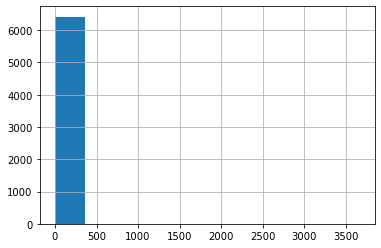

In [ ]:
# sentence lenght with space 
df_train_processed['len']= df_train_processed['tweet'].map(lambda x: len(x))
# sentence length without space
# df['len']= df['review']str.split().map(lambda x: len(x))
df_train_processed.sort_values('len', ascending=False).reset_index(drop=True)
print('Max length: {}, Min length: {}, Average Length :{}'.format(max(df_train_processed['len']),min(df_train_processed['len']),int(df_train_processed['len'].mean())))
df_train_processed['len'].hist()

# Word frequencies 

## word level exploration

In [ ]:
# creating text corpus
text= ' '.join(t for t in df['review'])
words_list= text.split()
word_freq= {}
for word in set(words_list):
    
    word_freq[word]= words_list.count(word)

df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])


In [ ]:
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word

,word,count,word_len
0,one,21412,3
1,see,16221,3
2,like,16181,4
3,make,15047,4
4,good,13628,4
...,...,...,...
24001,eastward,1,8
24002,unflatteringly,1,14
24003,dispersion,1,10
24004,acrid,1,5


In [ ]:
df_word.head(10)

,word,count,word_len
0,one,21412,3
1,see,16221,3
2,like,16181,4
3,make,15047,4
4,good,13628,4
5,time,12610,4
6,get,11776,3
7,well,11233,4
8,go,10956,2
9,watch,10391,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



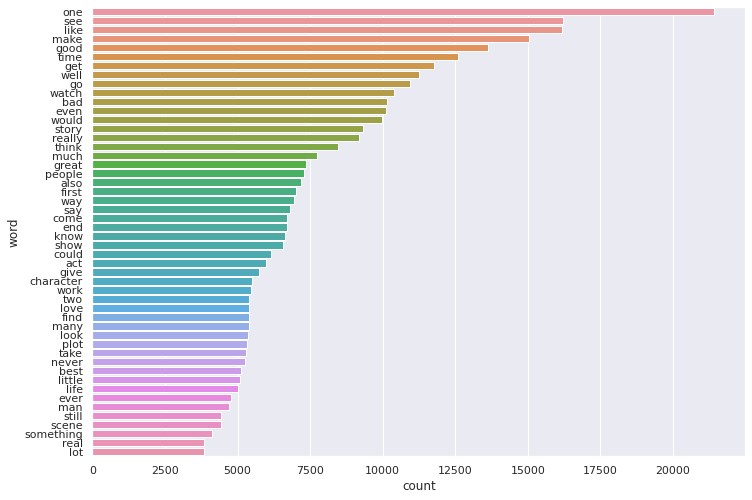

In [ ]:
# plotting only top 50 words
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_top= df_word.head(50)
sns.barplot(df_top['count'],df_top['word'])

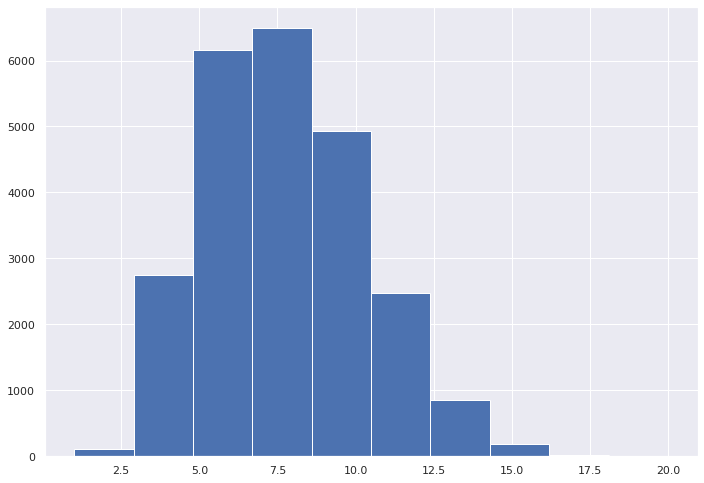

In [ ]:
df_word['word_len'].hist()

In [ ]:
df_word[df_word['word_len']==max(df_word['word_len'])]

,word,count,word_len
10842,uncharacteristically,7,20
22073,institutionalization,1,20


# n grams 

In [ ]:
df['pca'] = (
   df['review']
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)
hero.scatterplot(df, 'pca', color='sentiment', title="sentiment")

In [ ]:
df['kmeans_labels'] = (
    df['review']
    .pipe(hero.tfidf)
    .pipe(hero.kmeans, n_clusters=2)
    .astype(str)
)
sns.set(rc={'figure.figsize':(8.7,8.27)})
hero.scatterplot(df, 'pca', color='kmeans_labels', title="K-means")

In [ ]:
sns.set(rc={'figure.figsize':(8.7,8.27)})
hero.scatterplot(df, 'pca', color='kmeans_labels', title="K-means")

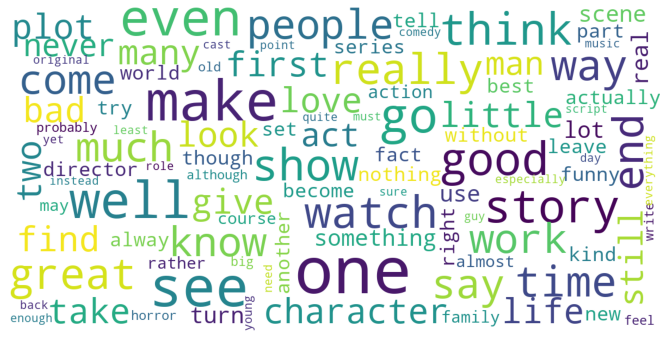

In [ ]:
# Generate a word cloud image
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1).generate(text)
plt.axis("off")
plt.imshow(wordcloud)

In [ ]:
df['review'][8]

'positive  look forward watch  bad mistake see truly one bad awful almost every way act  song lame country tune less four time  cheap nasty boring extreme rarely happy see end  thing give score far best performance least make bite effort one'

In [ ]:
TextBlob(df['review'][8]).sentiment

Sentiment(polarity=-0.21174242424242423, subjectivity=0.7211038961038961)

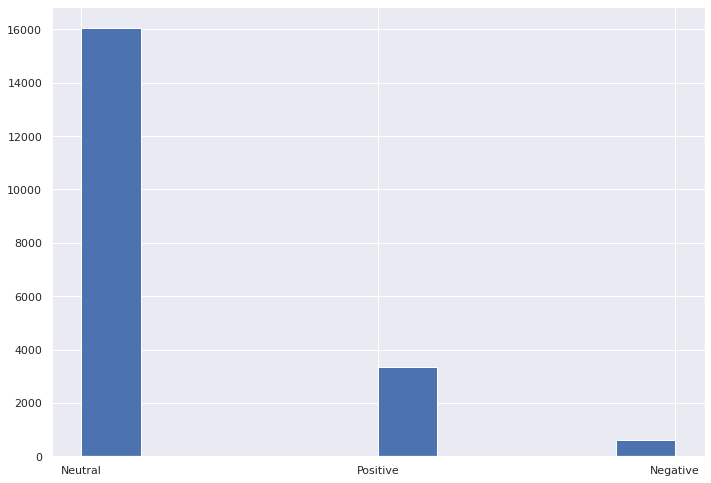

In [ ]:
def polarity(x):
    if TextBlob(x).sentiment[0]<-0.25:
        return 'Negative'
    if TextBlob(x).sentiment[0]>0.25:
        return 'Positive'
    return 'Neutral'

df['sentiment']= df['review'].map(lambda x: polarity(x))
df['sentiment'].hist()


In [ ]:

df['sentiment']=df['sentiment'].map(lambda x: polarity(x))

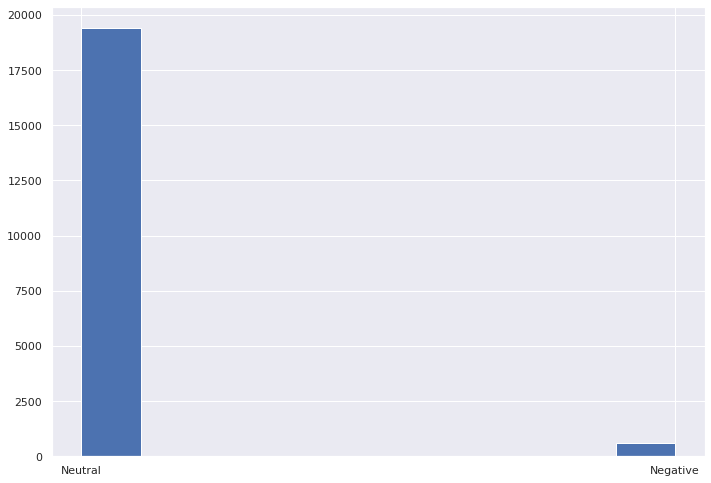

In [ ]:
df['sentiment'].hist()